In [1]:
# https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/
# mount Google Drive so we can access it
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# file paths to our data
#!ls 'gdrive/Shareddrives/CPSC 4176 Project Spring 2023/UAV Data'
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 4.8 MB/s eta 0:00:00


In [3]:
# [IMPORTS]

import tensorflow as tf
from tensorflow import keras
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor

from keras import models
from keras import layers

In [4]:
url = "gdrive/Shareddrives/CPSC 4176 Project Spring 2023/UAV Data/UAV_4_Data_down.xlsx"
# No need to read this, cleaned version available.
data = pd.read_excel(url, sheet_name = None)

In [5]:
# DATA NORMALIZATION WILL BE HANDLED BY sklearn.preprocessing.MinMaxScaler



In [6]:
# Data split section, here we split individual data frames from the data dictionary into individual dataframe variables.
raw_sheetArray = [data["Sheet1"],data["sheet2"],data["sheet3"],data["sheet4"],data["sheet5"]]
clean_sheetArray = [None,None,None,None,None]


In [9]:
# ---------------------------------------------------------------- DATA CLEANING SECTION [HIMANSHU BOHRA, DONGHYEON PARK] ---------------------------------------- #

# DATA CLEANING/PREP SECTION [ PRE-NORMALIZATION]

#clean_file = data.copy()

# The following functions need to be run only once so they create a file, not everytime we want to test the neural network.

# Cleaning function
def clean_speed_accel_UAV4(inputData):
  i=0
  #timeConstant = 0.03333
  old_data = None
  errors_found = 0

  while(i<inputData.shape[0]-1):
    # Cleaning the speed in UAV4
    old_data = inputData["Speed(m/s)"][inputData.index[i]] # Record old data
    inputData["Speed(m/s)"][inputData.index[i]] = (inputData["x-axis position(m)"][inputData.index[i+1]] - inputData["x-axis position(m)"][inputData.index[i]]) / (inputData["Time(s)"][inputData.index[i+1]] - inputData["Time(s)"][inputData.index[i]])
    # Add to the error count if old_data was changed
    if(old_data != inputData["Speed(m/s)"][inputData.index[i]]): errors_found = errors_found+1
    # Cleaning the accel in UAV4
    old_data = inputData["Acceleration(m/s^2)"][inputData.index[i]]
    inputData["Acceleration(m/s^2)"][inputData.index[i]] = (inputData["Speed(m/s)"][inputData.index[i+1]] -inputData["Speed(m/s)"][inputData.index[i]]) / (inputData["Time(s)"][inputData.index[i+1]] - inputData["Time(s)"][inputData.index[i]])
    # Same for error count:
    if(old_data != inputData["Acceleration(m/s^2)"][inputData.index[i]]): errors_found = errors_found+1
    i = i+1
  return [inputData, errors_found]


# Sorting, cleaning and concatenating by VehicleIDs to prevent speed/acc miscalculation.
def sort_by_VID(inputData):
    vID_list = inputData["VehicleID"].unique()

    # Resultant array containing ALL the cleaned dataframes for individual vehicle ID rows:
    cleaned_vehicle_rows = []
    
    # Iterators:
    vid_iterator = 0

    # NESTED LOOP VARIABLES FOR ERROR COUNT
    total_errors_found = 0
    tempArray = [None, None] # Result storage to reduce processing load [clean function is expensive]

    while(vid_iterator < len(vID_list)):
      currentVehicleIDRows = inputData.loc[inputData['VehicleID'] == vID_list[vid_iterator]]

      #DEBUG:
      #print(currentVehicleIDRows)

      tempArray = clean_speed_accel_UAV4(currentVehicleIDRows)
      cleaned_vehicle_rows.append(tempArray[0])
      total_errors_found = total_errors_found + tempArray[1]

      vid_iterator = vid_iterator + 1
      # END OF OUTER LOOP

    return [pd.concat( cleaned_vehicle_rows ) , total_errors_found ]




In [10]:
# EXECUTION

# TESTING
'''
temp_result_array = sort_by_VID(raw_sheetArray[1])
#clean_sheetArray = temp_result_array[1]

print(temp_result_array[0],temp_result_array[1])


# Applying the function to clean the data
'''

i=0
total_errors_from_cleaning = 0
while(i<5):
  temp_result_array = sort_by_VID(raw_sheetArray[i])
  clean_sheetArray[i] = temp_result_array[0]
  total_errors_from_cleaning += temp_result_array[1]
  i = i+1



'''
normalized_file = pd.DataFrame()
normalized_file['VehicleID'] = data['VehicleID']
normalized_file['LaneID'] = data['LaneID']
normalized_file['Time(s)'] = data['Time(s)
normalized_file['x-axis position(m)'] = NormalizeData(data['x-axis position(m)'])
normalized_file['VehicleID'] = data['VehicleID']
normalized_file['VehicleID'] = data['VehicleID']']
'''

#clean_file["Acceleration(m/s^2)"]
#print(clean_file[["Speed(m/s)","Acceleration(m/s^2)"]])
#print(clean_file['Sheet1'])

<ipython-input-9-985cabf67f9f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputData["Speed(m/s)"][inputData.index[i]] = (inputData["x-axis position(m)"][inputData.index[i+1]] - inputData["x-axis position(m)"][inputData.index[i]]) / (inputData["Time(s)"][inputData.index[i+1]] - inputData["Time(s)"][inputData.index[i]])
<ipython-input-9-985cabf67f9f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputData["Acceleration(m/s^2)"][inputData.index[i]] = (inputData["Speed(m/s)"][inputData.index[i+1]] -inputData["Speed(m/s)"][inputData.index[i]]) / (inputData["Time(s)"][inputData.index[i+1]] - inputData["Time(s)"][i

"\nnormalized_file = pd.DataFrame()\nnormalized_file['VehicleID'] = data['VehicleID']\nnormalized_file['LaneID'] = data['LaneID']\nnormalized_file['Time(s)'] = data['Time(s)\nnormalized_file['x-axis position(m)'] = NormalizeData(data['x-axis position(m)'])\nnormalized_file['VehicleID'] = data['VehicleID']\nnormalized_file['VehicleID'] = data['VehicleID']']\n"

In [ ]:
#print(raw_sheetArray[0])

In [11]:
# Saving to drive, to reduce processing load re-occurance.
tempConcatFile = pd.concat(raw_sheetArray)

# create a Pandas Excel writer object
writer = pd.ExcelWriter(r'gdrive/Shareddrives/CPSC 4176 Project Spring 2023/Code/NormalizedDataExcelFile/UAV_4_Data_down_CleanedFinal.xlsx', engine='xlsxwriter')

# write each DataFrame to a separate sheet in the Excel file
clean_sheetArray[0].to_excel(writer, sheet_name='Sheet1')
clean_sheetArray[1].to_excel(writer, sheet_name='Sheet2')
clean_sheetArray[2].to_excel(writer, sheet_name='Sheet3')
clean_sheetArray[3].to_excel(writer, sheet_name='Sheet4')
clean_sheetArray[4].to_excel(writer, sheet_name='Sheet5')

# save the Excel file and close the writer
writer.save()
writer.close()

# Logging the errors from the above code block's cleaning:
with open('gdrive/Shareddrives/CPSC 4176 Project Spring 2023/Code/NormalizedDataExcelFile/UAV_4_Data_down_ERRORLOG.txt', 'w') as f:
  f.write('Total record check: ' + str(tempConcatFile.shape[0]) + "\n")
  f.write('Total Errors Found: ' + str(total_errors_from_cleaning))

'''

# Getting individual sheets

# ----------------------------------------------------------------------- END OF DATA CLEANING ----------------------------------------------------------------#
'''

<ipython-input-11-a88be1664ae7>:15: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
/usr/local/lib/python3.9/dist-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


'\n\n# Getting individual sheets\n\n# ----------------------------------------------------------------------- END OF DATA CLEANING ----------------------------------------------------------------#\n'

In [20]:
cleanconcat = pd.concat(clean_sheetArray,ignore_index=True)
rawconcat = pd.concat(raw_sheetArray,ignore_index=True)
#plt.plot(cleanconcat["Speed(m/s)"], label="Cleaned Data")
#cleanconcat.plot(kind = 'scatter', x = 'VehicleID', y = 'Speed(m/s)')
#cleanconcat["Speed(m/s)"].min()
#cleanconcat["Speed(m/s)"].max()  # 26.08253226488907
#rawconcat["Speed(m/s)"].max()   # 26.08253226488907

#cleanconcat["Speed(m/s)"].nlargest(300)
#rawconcat["Speed(m/s)"].min()
#cleanconcat.iloc[[237041+472242]]

#cleanconcat["Speed(m/s)"].sum() # 22123569.766401682
#rawconcat["Speed(m/s)"].sum() # 22123520.02390859

22123520.02390859

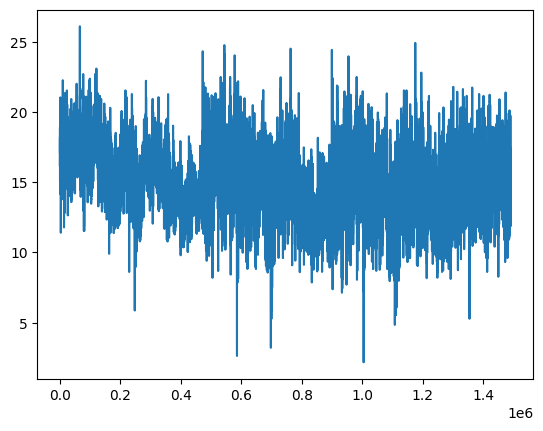

In [15]:
plt.plot(cleanconcat["Speed(m/s)"], label="Raw Data")

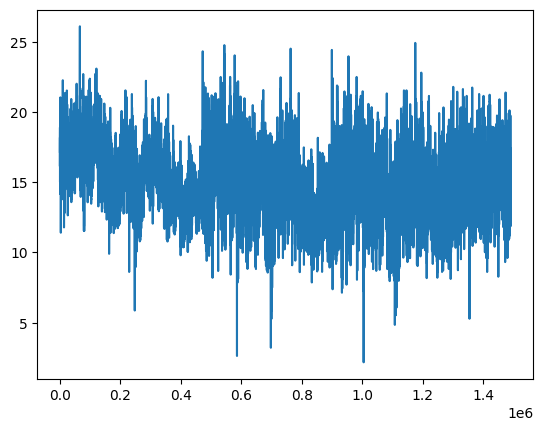

In [16]:
plt.plot(rawconcat["Speed(m/s)"], label="Raw Data")

In [ ]:
# EXTRA PREPROCESSING:
# cleaned file path: 'gdrive/Shareddrives/CPSC 4176 Project Spring 2023/Code/NormalizedDataExcelFile/UAV_4_Data_down_Cleaned.xlsx'
# raw file path: url = "gdrive/Shareddrives/CPSC 4176 Project Spring 2023/UAV Data/UAV_4_Data_down.xlsx"
data = pd.read_excel('gdrive/Shareddrives/CPSC 4176 Project Spring 2023/UAV Data/UAV_4_Data_down.xlsx', sheet_name=None)


In [ ]:
data["Sheet1"].shape
concatData = pd.concat([data["Sheet1"], data["sheet2"],data["sheet3"],data["sheet4"],data["sheet5"]], ignore_index = True)
concatData.shape
print(concatData.loc[[2]])


   VehicleID  LaneID  Time(s)  x-axis position(m)  \
2          7       1  0.09999          294.029097   

   Distance from upper Lane line(m)  Distance from lower lane line(m)  \
2                          1.531513                          2.040078   

   Speed(m/s)  Acceleration(m/s^2)  VehicleLength(meter)  VehicleWidth(meter)  
2   17.170339             0.186334              5.101913             2.058609  


In [ ]:
'''
data["Lane Widths"] = (
    data["Distance from upper Lane line(m)"] + data["Distance from lower lane line(m)"] + data["VehicleWidth(meter)"] + data["VehicleLength(meter)"]
)

print(data["Lane Widths"])
'''

KeyError: ignored

In [ ]:
# TEST AND JUNK
# TODO: Now that data is normalized, make it into a RNN model
# Need to split into train, val, test
# this doesn't randomly 
# Load the data from the excel file

# print a specific row: print(data.loc[[159220]])

In [ ]:
# THE MODEL STARTS HERE:

In [ ]:
# Load data:
df = data.copy()

# Define model
# Split the data into training and testing datasets
train_data = []
test_data = []
# Assume data is a dictionary with lane names as keys and DataFrames as values
lane_names = list(data.keys())
train_data = {}
test_data = {}
for lane in lane_names:
    lane_data = data[lane]
    lane_values = lane_data.values
    lane_train, lane_test = train_test_split(lane_values, test_size=0.2)
    lane_train_df = pd.DataFrame(lane_train, columns=lane_data.columns)
    lane_test_df = pd.DataFrame(lane_test, columns=lane_data.columns)
    train_data[lane] = lane_train_df
    test_data[lane] = lane_test_df

# Concatenate the training and testing datasets
train_data = pd.concat(train_data)
test_data = pd.concat(test_data)

# Separate the features and targets
train_features = train_data.drop(columns=['Time(s)'])
train_targets = train_data['Time(s)']
test_features = test_data.drop(columns=['Time(s)'])
test_targets = test_data['Time(s)']

# Scale the features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Train the model
model = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='adam', max_iter=25, verbose=True) #max iteration default = 1000
model.fit(train_features_scaled, train_targets)

# Make predictions on the test dataset
predicted_targets = model.predict(test_features_scaled)

# Put the predicted targets into a dataframe with the same format as the input data
output_data = test_data.copy()
output_data['Predicted Time(s)'] = predicted_targets

# Write the output dataframe to an output file
output_data.to_excel("gdrive/Shareddrives/CPSC 4176 Project Spring 2023/Code/NormalizedDataExcelFile/PredictedValues2.xlsx", index=False)


Iteration 1, loss = 52525.33346672
Iteration 2, loss = 549.91084252
Iteration 3, loss = 24.36264717
Iteration 4, loss = 9.87819319
Iteration 5, loss = 8.15315704
Iteration 6, loss = 7.38796520
Iteration 7, loss = 6.70556319
Iteration 8, loss = 5.79192728
Iteration 9, loss = 4.35039860
Iteration 10, loss = 3.31758839
Iteration 11, loss = 3.05305200
Iteration 12, loss = 2.83688371
Iteration 13, loss = 2.87934617
Iteration 14, loss = 2.58648144
Iteration 15, loss = 2.61269873
Iteration 16, loss = 2.48812713
Iteration 17, loss = 2.59484419
Iteration 18, loss = 2.40179224
Iteration 19, loss = 2.37942762
Iteration 20, loss = 2.35281350
Iteration 21, loss = 2.27959328
Iteration 22, loss = 2.24293833
Iteration 23, loss = 2.31214846
Iteration 24, loss = 2.15077275
Iteration 25, loss = 2.19000381


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# The above was feed forward, which is not what we want, this is the back propagation:
# Load the data

# Split data into train and test set

# Assume data is a dictionary with lane names as keys and DataFrames as values
lane_names = list(data.keys())
train_data = {}
test_data = {}
for lane in lane_names:
    lane_data = data[lane]
    lane_values = lane_data.values
    lane_train, lane_test = train_test_split(lane_values, test_size=0.2)
    lane_train_df = pd.DataFrame(lane_train, columns=lane_data.columns)
    lane_test_df = pd.DataFrame(lane_test, columns=lane_data.columns)
    train_data[lane] = lane_train_df
    test_data[lane] = lane_test_df

# Split the inputs and output variables
train_inputs = train_data.iloc[:, :-1]
train_output = train_data.iloc[:, -1]

test_inputs = test_data.iloc[:, :-1]
test_output = test_data.iloc[:, -1]

# Define the model architecture
model = Sequential()
model.add(Dense(12, input_dim=train_inputs.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_inputs, train_output, epochs=150, batch_size=10, verbose=0)

# Evaluate the model
accuracy = model.evaluate(test_inputs, test_output, verbose=0)
print('Accuracy: {:.2f}%'.format(accuracy[1]*100))

AttributeError: ignored